# Attributes Packs and Value Regresesion

This analisy is about predicting the number of packs and their value using diferent attributes from a dataset. To achive the objective It is going to be used a multivariable lineal regression and random forest models. 

## 1.DATASET TREATMENT

In [238]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

#to avoid .loc warning
pd.options.mode.chained_assignment = None  # default='warn'


Dataset loading, points are understanded as thousands not decimals.

In [239]:
dataset=pd.read_excel("test_task_for_working_students_.xlsx", sheet_name="data", thousands=".")

dataset.head()

,Record ID,year,month,MoleculeName,TradeName,ProductName,Packs,Value
0,1,2017,12,molecule1,brand1,SKU1,2966.0,32504.671461
1,2,2017,12,molecule2,brand2,SKU2,7675.0,5627.328111
2,3,2017,12,molecule2,brand2,SKU3,24404.0,10741.583225
3,4,2017,12,molecule3,brand3,SKU4,14775.0,65098.087341
4,5,2017,12,molecule3,brand3,SKU5,18206.0,61614.771981


Now, It is necessary to analyse if there is any NaN value.

In [240]:
print("Dataset size:", dataset.shape)
print(dataset.isnull().sum())

Dataset size: (5598, 8)
Record ID          0
year               0
month              0
MoleculeName       0
TradeName          0
ProductName        0
Packs           1339
Value           1344
dtype: int64


It seem that exist 5 NaN values a part of those which are going to be predicted. The samples with NaN values are the next ones:

In [241]:
filas_filtradas = dataset.loc[dataset['Value'].isna() & (dataset["Packs"].notna())]
print(filas_filtradas)

      Record ID  year  month MoleculeName TradeName ProductName  Packs  Value
1388       1389  2018     11   molecule16   brand33       SKU86    0.0    NaN
1504       1505  2018     12   molecule16   brand33       SKU84    0.0    NaN
1506       1507  2018     12   molecule16   brand33       SKU86    0.0    NaN
2098       2099  2019      5   molecule18   brand46      SKU110    0.0    NaN
3851       3852  2020      9   molecule16   brand33       SKU86    0.0    NaN


In [242]:
filas_filtradas = dataset.loc[dataset['Packs'].isna() & (dataset["Value"].notna())]
print(filas_filtradas)

Empty DataFrame
Columns: [Record ID, year, month, MoleculeName, TradeName, ProductName, Packs, Value]
Index: []


To obtain only the data to train the models, avoiding samples with NaN values and samples that are to be predicted, a conditional is used. Samples are taken with Packs and Value attributes that are not NaN.

In [243]:
dfNotNan=dataset[(dataset["Packs"].notna()) & (dataset["Value"].notna())]
print("Dataset without NaN size:", dfNotNan.shape)
print(dfNotNan.isnull().sum())

Dataset without NaN size: (4254, 8)
Record ID       0
year            0
month           0
MoleculeName    0
TradeName       0
ProductName     0
Packs           0
Value           0
dtype: int64


In [244]:
dfNotNan.describe()

,Record ID,year,month,Packs,Value
count,4254.000000,4254.000000,4254.000000,4254.000000,4.254000e+03
mean,2130.070052,2018.925482,6.659614,33152.628820,1.684403e+05
std,1229.923916,0.875963,3.530097,61483.010684,3.499805e+05
min,1.000000,2017.000000,1.000000,3.000000,3.555653e-02
25%,1064.250000,2018.000000,4.000000,1012.750000,1.076710e+04
50%,2131.500000,2019.000000,7.000000,8286.000000,5.309965e+04
75%,3194.750000,2020.000000,10.000000,30171.250000,1.600998e+05
max,4259.000000,2020.000000,12.000000,452364.000000,3.450784e+06


In [245]:
print(dfNotNan.dtypes)

Record ID         int64
year              int64
month             int64
MoleculeName     object
TradeName        object
ProductName      object
Packs           float64
Value           float64
dtype: object


It is necessary to convert object attributes, which are labels, to numeric.

In [246]:
encoder1 = LabelEncoder()

dfNotNan["MoleculeName_coded"]=encoder1.fit_transform(dfNotNan["MoleculeName"])

encoder2 = LabelEncoder()
dfNotNan["TradeName_coded"]=encoder2.fit_transform(dfNotNan["TradeName"])

encoder3 = LabelEncoder()
dfNotNan["ProductName_coded"]=encoder3.fit_transform(dfNotNan["ProductName"])

#object attributes are not necessary anymore
dfNotNan.drop(columns=["MoleculeName", "TradeName", "ProductName"], inplace=True)

ID attribute is not necessary.

In [247]:
dfNotNan.drop(columns=["Record ID"], inplace=True)
print(dfNotNan.head())

   year  month    Packs         Value  MoleculeName_coded  TradeName_coded  \
0  2017     12   2966.0  32504.671461                   0                0   
1  2017     12   7675.0   5627.328111                  11               11   
2  2017     12  24404.0  10741.583225                  11               11   
3  2017     12  14775.0  65098.087341                  20               22   
4  2017     12  18206.0  61614.771981                  20               22   

   ProductName_coded  
0                  0  
1                 66  
2                 77  
3                 88  
4                 99  


Packs and Value atributtes are the objectives attributes. It is necessary to see the correlation with others attributes from the dataset:

# 2.DATASET ANALYSE

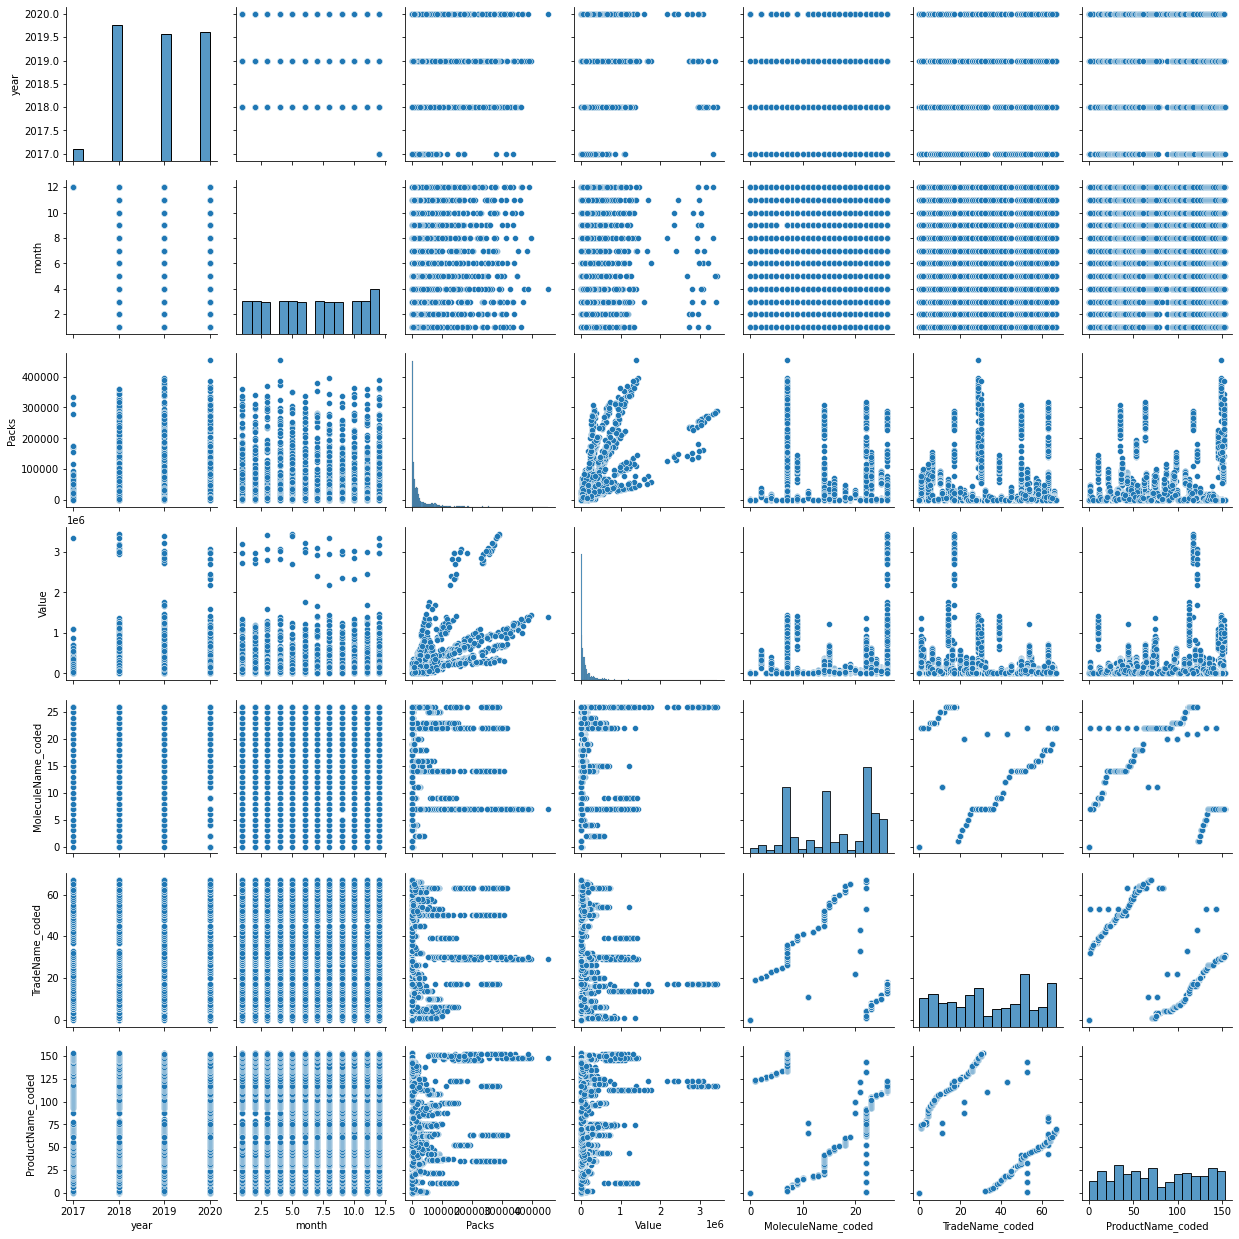

In [248]:
sns.pairplot(dfNotNan)

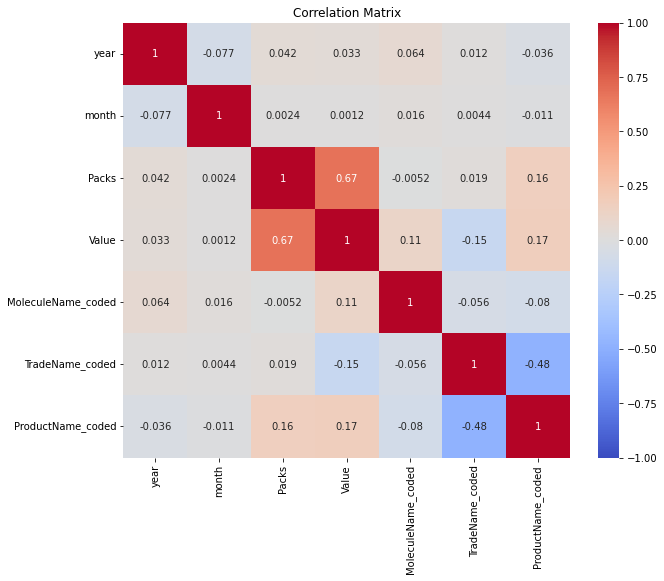

In [249]:
correlationMatrix = dfNotNan.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# 3.MODEL SELECTION

## 3.1. Linear Regresion with attribute Year

In [250]:
X=dfNotNan.drop(columns=["month", "Value", "Packs"])
X.head()

,year,MoleculeName_coded,TradeName_coded,ProductName_coded
0,2017,0,0,0
1,2017,11,11,66
2,2017,11,11,77
3,2017,20,22,88
4,2017,20,22,99


In [251]:
Y=dfNotNan["Packs"]
Y.head()

0     2966.0
1     7675.0
2    24404.0
3    14775.0
4    18206.0
Name: Packs, dtype: float64

In [252]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

#Creation and model training
modelPacks1 = LinearRegression()
modelPacks1.fit(X_train, Y_train)

#Model Testing
print("R^2 with Year modelPacks1 :",modelPacks1.score(X_test,Y_test))

R^2 with Year modelPacks1 : 0.03270170822907836


In [253]:
Y=dfNotNan["Value"]
Y.head()

0    32504.671461
1     5627.328111
2    10741.583225
3    65098.087341
4    61614.771981
Name: Value, dtype: float64

In [254]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

#Creation and model training
modelValue1 = LinearRegression()
modelValue1.fit(X_train, Y_train)

#Model Testing
print("R^2 with Year modelValue1 :",modelValue1.score(X_test,Y_test))

R^2 with Year modelValue1 : 0.044453736903725116


## 3.2. Linear Regresion without attribute Year

In [255]:
X=dfNotNan.drop(columns=["month", "year", "Value", "Packs"])
X.head()

,MoleculeName_coded,TradeName_coded,ProductName_coded
0,0,0,0
1,11,11,66
2,11,11,77
3,20,22,88
4,20,22,99


In [256]:
Y=dfNotNan["Packs"]
Y.head()

0     2966.0
1     7675.0
2    24404.0
3    14775.0
4    18206.0
Name: Packs, dtype: float64

In [257]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

#Creation and model training
modelPacks2 = LinearRegression()
modelPacks2.fit(X_train, Y_train)

#Model Testing
print("R^2 without Year modelPacks1 :",modelPacks2.score(X_test,Y_test))

R^2 without Year modelPacks1 : 0.036696830193304275


In [258]:
Y=dfNotNan["Value"]
Y.head()

0    32504.671461
1     5627.328111
2    10741.583225
3    65098.087341
4    61614.771981
Name: Value, dtype: float64

In [259]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

#Creation and model training
modelValue2 = LinearRegression()
modelValue2.fit(X_train, Y_train)

#Model Testing
print("R^2 without Year modelPacks1 :",modelValue2.score(X_test,Y_test))

R^2 without Year modelPacks1 : 0.04604988179562197


## 3.3. Random Forest

In [260]:
# Separate attributes and regression targets
X=dfNotNan.drop(columns=["Value", "Packs"])
X.head()
Y = dfNotNan['Packs']

attributes = []

# Iterate through attribute columns
for column in X.columns:
    # Add one more column to the attribute set
    attributes = attributes + [column]
    
    print("Attributes:", attributes)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X[attributes], Y, test_size=0.8, random_state=42)

    #Creation and model training
    modelRandomFValue= RandomForestRegressor(n_estimators=100, random_state=42)
    modelRandomFValue.fit(X_train, Y_train)

    #Model Testing
    print("R^2 modelRandomFValue :",modelRandomFValue.score(X_test,Y_test))

Attributes: ['year']
R^2 modelRandomFValue : -0.0096982862792927
Attributes: ['year', 'month']
R^2 modelRandomFValue : -0.05981788111518349
Attributes: ['year', 'month', 'MoleculeName_coded']
R^2 modelRandomFValue : -0.23805024444105594
Attributes: ['year', 'month', 'MoleculeName_coded', 'TradeName_coded']
R^2 modelRandomFValue : 0.23310956935651272
Attributes: ['year', 'month', 'MoleculeName_coded', 'TradeName_coded', 'ProductName_coded']
R^2 modelRandomFValue : 0.9063199086365277


In [261]:
X=dfNotNan.drop(columns=["month", "Value", "Packs"])
X.head()

,year,MoleculeName_coded,TradeName_coded,ProductName_coded
0,2017,0,0,0
1,2017,11,11,66
2,2017,11,11,77
3,2017,20,22,88
4,2017,20,22,99


In [262]:
Y=dfNotNan["Packs"]
Y.head()

0     2966.0
1     7675.0
2    24404.0
3    14775.0
4    18206.0
Name: Packs, dtype: float64

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

#Creation and model training
modelRandomFPacks= RandomForestRegressor(n_estimators=100, random_state=42)
modelRandomFPacks.fit(X_train, Y_train)

#Model Testing
print("R^2 modelRandomFPacks :",modelRandomFPacks.score(X_test,Y_test))

R^2 modelRandomFPacks : 0.9218864088940446


In [264]:
Y=dfNotNan["Value"]
Y.head()

0    32504.671461
1     5627.328111
2    10741.583225
3    65098.087341
4    61614.771981
Name: Value, dtype: float64

It is not necessary to change the X.

In [265]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

#Creation and model training
modelRandomFValue= RandomForestRegressor(n_estimators=100, random_state=42)
modelRandomFValue.fit(X_train, Y_train)

#Model Testing
print("R^2 modelRandomFValue :",modelRandomFValue.score(X_test,Y_test))

R^2 modelRandomFValue : 0.801691805824335


# 4.ADDING PREDICTIONS

Random Forest models created before are the ones tih more R^2 so they are going to be used to predict. We use the same conditional to avoid NaN values. But first, creation of dataset copy.


In [266]:
#taking only samples must be predicted
data2Predict=dataset[(dataset["Packs"].isna()) & (dataset["Value"].isna())]

#encoding label attributes with different encoders to decoder before, encoders had been created before

data2Predict["MoleculeName_coded"]=encoder1.fit_transform(data2Predict["MoleculeName"])

data2Predict["TradeName_coded"]=encoder2.fit_transform(data2Predict["TradeName"])

data2Predict["ProductName_coded"]=encoder3.fit_transform(data2Predict["ProductName"])

#object attributes are not necessary anymore
data2Predict.drop(columns=["MoleculeName", "TradeName", "ProductName"], inplace=True)


print(data2Predict.isnull().sum())

Record ID                0
year                     0
month                    0
Packs                 1339
Value                 1339
MoleculeName_coded       0
TradeName_coded          0
ProductName_coded        0
dtype: int64


In [267]:
x2predict=data2Predict.drop(columns=["month", "Packs", "Value", "Record ID"])
print("Dataset size:", x2predict.shape)
print(x2predict.isnull().sum())

Dataset size: (1339, 4)
year                  0
MoleculeName_coded    0
TradeName_coded       0
ProductName_coded     0
dtype: int64


Prediction of Packs attribute:

In [268]:
yPredicted=modelRandomFPacks.predict(x2predict)


#new dataset to save final result
#Those rows which are not going to be predicted and have NaN value are dropped
data2save=dataset.drop(dataset[dataset['Value'].isna() & (dataset["Packs"].notna())].index)
print(data2save.shape)

# Agregar las predicciones a la columna "target" en el DataFrame original
data2save.loc[data2save['Packs'].isnull(), 'Packs'] = yPredicted
print(data2save.isnull().sum())

(5593, 8)
Record ID          0
year               0
month              0
MoleculeName       0
TradeName          0
ProductName        0
Packs              0
Value           1339
dtype: int64


Prediction of Value attribute:

In [269]:
yPredicted=modelRandomFValue.predict(x2predict)
# Agregar las predicciones a la columna "target" en el DataFrame original
data2save.loc[data2save['Value'].isnull(), 'Value'] = yPredicted
print(data2save.isnull().sum())

Record ID       0
year            0
month           0
MoleculeName    0
TradeName       0
ProductName     0
Packs           0
Value           0
dtype: int64


Dowloand new dataset with data predicted:

In [270]:
data2save.to_excel("predictionResults.xlsx", index=False)